A document seems to be a sequence of cells, each of which has one of markdown, code, Raw NBConvert or Heading as its type. This text is in a markdown cell and hence, presumably, I can have **bold** and _italic_ text.

In [5]:
# This is a code cell
for i in range(5):
    print (i + 1)
print ("Once I caught a fish alive.")

1
2
3
4
5
Once I caught a fish alive.


# This is a heading cell
but apparently headings are deprecated and instead Jupyter converts them to markdown cells and prepends your text with the hash sign to make it a markdown heading.
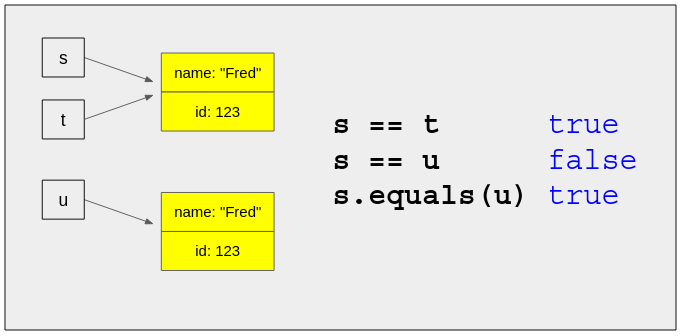

**git config --global credential.helper 'cache --timeout=7200'**